<a href="https://colab.research.google.com/github/SurajLahariya/ML-projects/blob/main/Telecome_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Churn.xlsx to Churn.xlsx


In [3]:
df = pd.read_excel('Churn.xlsx')

###EDA

In [4]:
df

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1.0,KS,area_code_415,128.0,yes,25.0,no,10.0,3.0,2.70,...,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,1.0,no
1,2.0,OH,area_code_415,107.0,yes,26.0,no,13.7,3.0,3.70,...,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,1.0,no
2,3.0,NJ,area_code_415,137.0,no,0.0,no,12.2,5.0,3.29,...,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,0.0,no
3,4.0,OH,area_code_408,84.0,no,0.0,yes,6.6,7.0,1.78,...,71.0,50.9,61.9,88.0,5.26,196.9,89.0,8.86,2.0,no
4,5.0,OK,area_code_415,75.0,no,0.0,yes,10.1,3.0,2.73,...,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,3.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996.0,HI,area_code_408,50.0,yes,40.0,no,9.9,5.0,2.67,...,127.0,40.07,223.0,126.0,18.96,297.5,116.0,13.39,2.0,no
4996,4997.0,WV,area_code_415,152.0,no,0.0,no,14.7,2.0,3.97,...,90.0,31.31,256.8,73.0,21.83,213.6,113.0,9.61,3.0,yes
4997,4998.0,DC,area_code_415,61.0,no,0.0,no,13.6,4.0,3.67,...,89.0,23.9,172.8,128.0,14.69,212.4,97.0,9.56,1.0,no
4998,4999.0,DC,area_code_510,109.0,no,0.0,no,8.5,6.0,2.30,...,67.0,32.1,171.7,92.0,14.59,224.4,89.0,10.10,0.0,no


Print the shape of Dataset

In [5]:
df.shape

(5000, 21)

Checking Duplicate rows

In [6]:
df[df.duplicated()]

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn


Dropping Unnamed column

In [7]:
df = df.drop('Unnamed: 0', axis=1)

Checking dtypes of columns and also if there is any missing values in dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   float64
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   float64
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   float64
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   float64
 11  day.charge      5000 non-null   object 
 12  eve.mins        5000 non-null   object 
 13  eve.calls       5000 non-null   float64
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   float64
 17  night.charge    5000 non-null   f

Rename the columns remove dot from column name

In [9]:
df.columns

Index(['state', 'area.code', 'account.length', 'voice.plan', 'voice.messages',
       'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
       'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
       'night.mins', 'night.calls', 'night.charge', 'customer.calls', 'churn'],
      dtype='object')

In [10]:
df.rename(columns={"area.code": "area_code", "account.length": "account_length", 'voice.plan':'voice_plan', 'voice.messages':'voice_messages', 'intl.plan': 'intl_plan', 'intl.mins':'intl_mins', 'intl.calls':'intl_calls',
                   'intl.charge':'intl_charge','day.mins':'day_mins', 'day.calls':'day_calls','day.charge':'day_charge','eve.mins':'eve_mins', 'eve.calls':'eve_calls', 'eve.charge':'eve_charge', 'night.mins':'night_mins','night.calls':'night_calls',
                   'night.charge':'night_charge', 'customer.calls':'customer_calls'}, inplace=True)

In [11]:
df.head(1)

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,KS,area_code_415,128.0,yes,25.0,no,10.0,3.0,2.7,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,1.0,no


Dataframe has 2 object column as these columns has NAN as string values, So we will change these column to int/float dtype

In [12]:
df['day_charge']=df['day_charge'].astype(float)

In [13]:
df['eve_mins']=df['eve_mins'].astype(float)

Checking dtypes of columns and also if there is any missing values in dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area_code       5000 non-null   object 
 2   account_length  5000 non-null   float64
 3   voice_plan      5000 non-null   object 
 4   voice_messages  5000 non-null   float64
 5   intl_plan       5000 non-null   object 
 6   intl_mins       5000 non-null   float64
 7   intl_calls      5000 non-null   float64
 8   intl_charge     5000 non-null   float64
 9   day_mins        5000 non-null   float64
 10  day_calls       5000 non-null   float64
 11  day_charge      4993 non-null   float64
 12  eve_mins        4976 non-null   float64
 13  eve_calls       5000 non-null   float64
 14  eve_charge      5000 non-null   float64
 15  night_mins      5000 non-null   float64
 16  night_calls     5000 non-null   float64
 17  night_charge    5000 non-null   f

In [15]:
df.isna().sum()

state              0
area_code          0
account_length     0
voice_plan         0
voice_messages     0
intl_plan          0
intl_mins          0
intl_calls         0
intl_charge        0
day_mins           0
day_calls          0
day_charge         7
eve_mins          24
eve_calls          0
eve_charge         0
night_mins         0
night_calls        0
night_charge       0
customer_calls     0
churn              0
dtype: int64

Identifying rows with missing/ Nan values

In [16]:
df[df.isna().any(axis=1)].shape

(31, 20)

We have 31 rows with missing values.

In [17]:
(31/5000)*100

0.62

0.62 percent of total is missing values data. WE can drop them or treat them. Lets keep the missing values in dataset

In [18]:
df.describe()

,account_length,voice_messages,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4993.000000,4976.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,30.653501,200.580326,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,9.166356,50.554637,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,24.430000,166.275000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


In [19]:
df.describe(include='object')

,state,area_code,voice_plan,intl_plan,churn
count,5000,5000,5000,5000,5000
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,158,2495,3677,4527,4293


In [20]:
high_cust_calls = df[df['customer_calls']>=4]

We can see account_length has average 100, so we can assume these values are in months

###Visualazation

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
#sns.pairplot(data=df, hue='churn')

From pairplot we can see there is strong corr between  Day_min, night_mins, eve_min, intl_min and thier resp charges.

In [23]:
num_cols = [cols for cols in df.columns if df[cols].dtype!='O']
num_cols

['account_length',
 'voice_messages',
 'intl_mins',
 'intl_calls',
 'intl_charge',
 'day_mins',
 'day_calls',
 'day_charge',
 'eve_mins',
 'eve_calls',
 'eve_charge',
 'night_mins',
 'night_calls',
 'night_charge',
 'customer_calls']

In [24]:
cat_cols = [cols for cols in df.columns if df[cols].dtype=='O']
cat_cols

['state', 'area_code', 'voice_plan', 'intl_plan', 'churn']

In [25]:
from sklearn.feature_selection import mutual_info_classif 

In [26]:
data = df.dropna(axis=0)

In [27]:
data.head(2)

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,KS,area_code_415,128.0,yes,25.0,no,10.0,3.0,2.7,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,1.0,no
1,OH,area_code_415,107.0,yes,26.0,no,13.7,3.0,3.7,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,1.0,no


In [28]:
data.shape

(4969, 20)

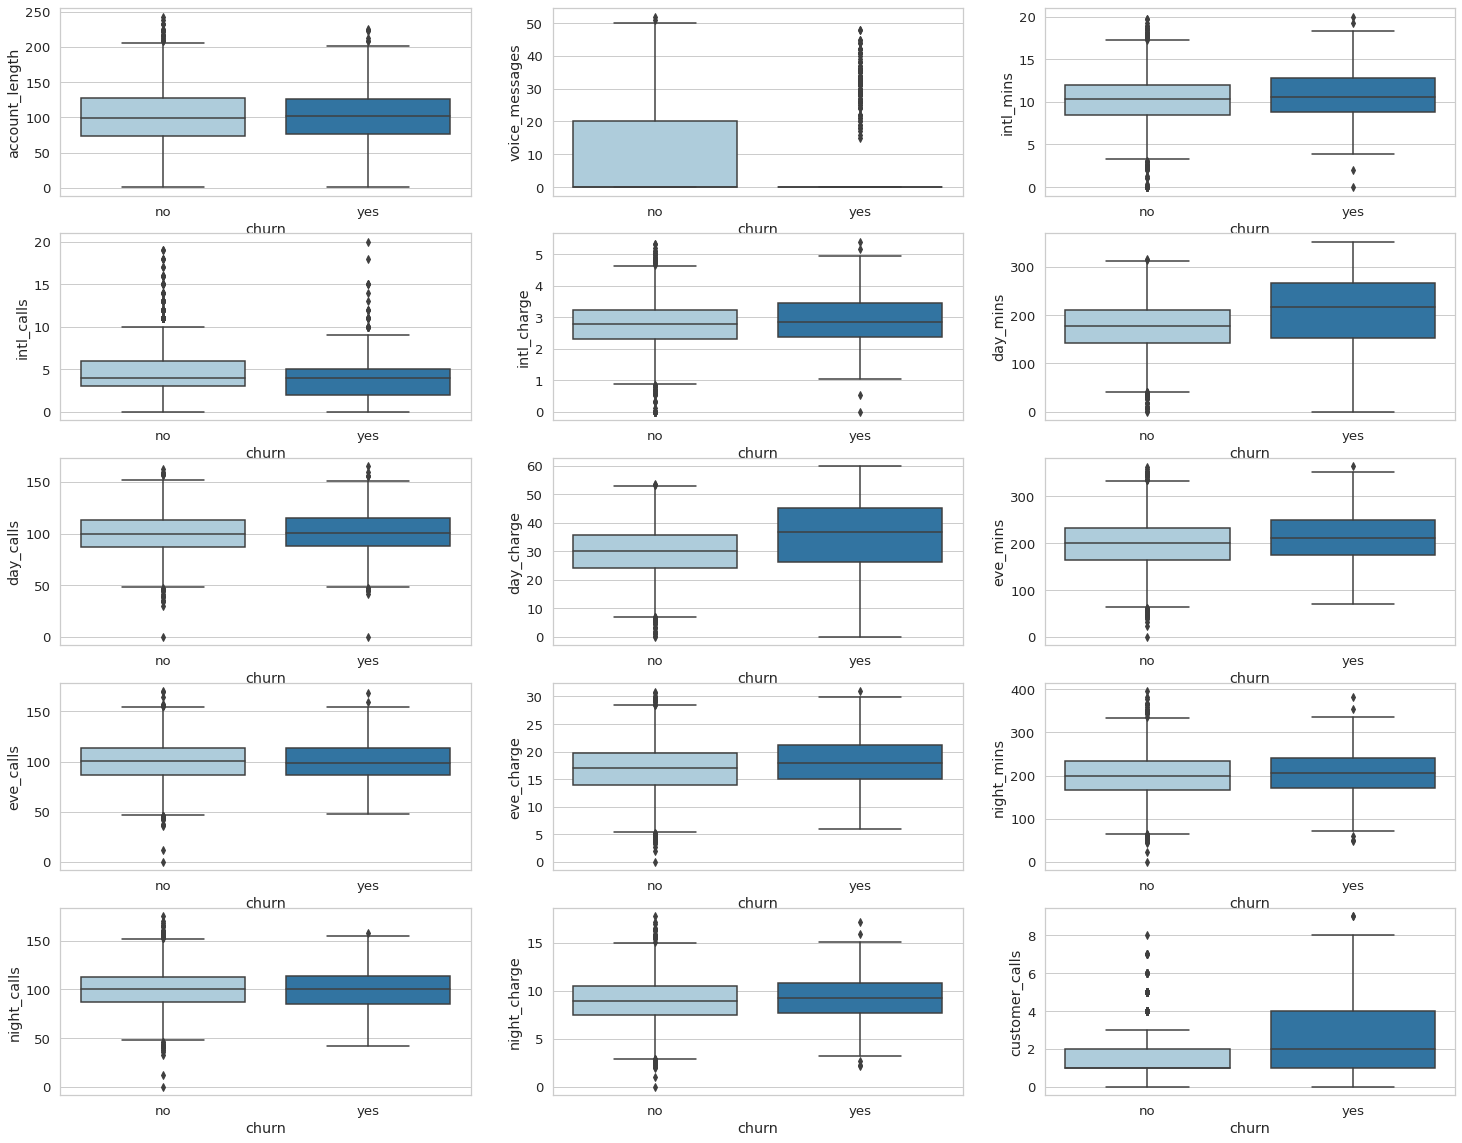

In [29]:
target_class_name = 'churn'
features = num_cols

sns.set(style = 'whitegrid', font_scale = 1.2, palette = 'Paired')
plt.subplots(figsize = (25,20))

for i in range(1,16):
    plt.subplot(5,3,i)
    sns.boxplot(x=target_class_name, y=features[i-1], data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

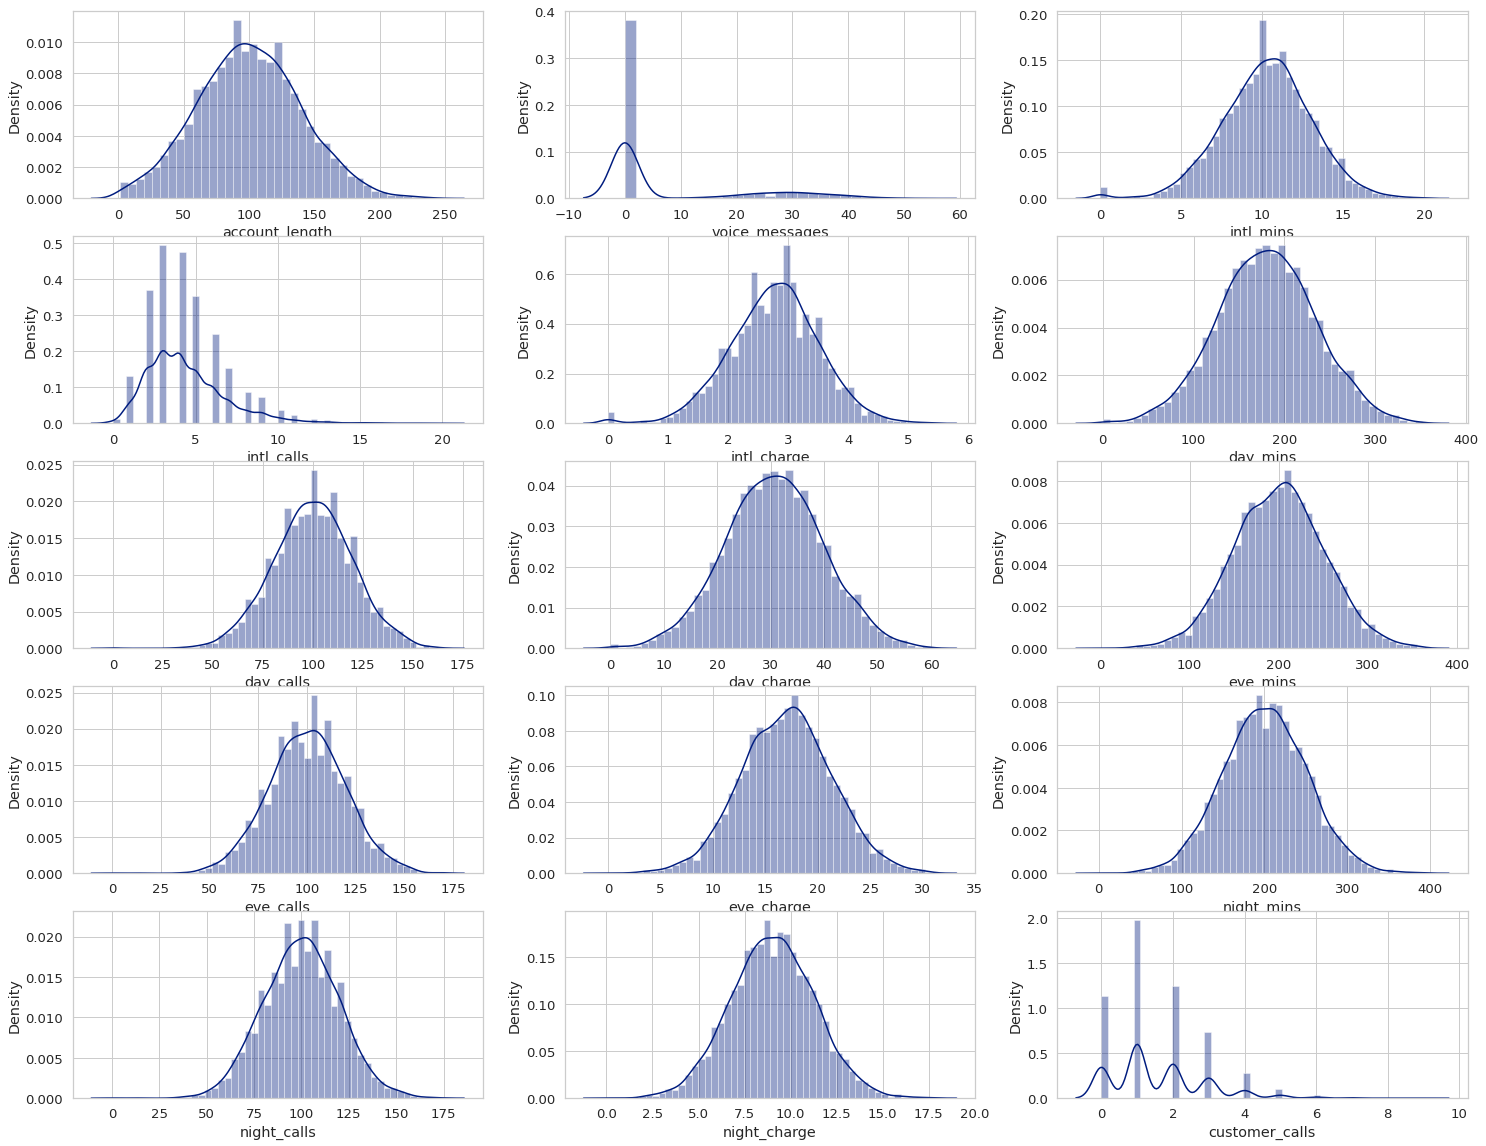

In [ ]:
features = num_cols

sns.set(style = 'whitegrid', font_scale = 1.2, palette = 'dark')
plt.subplots(figsize = (25,20))

for i in range(1,16):
    plt.subplot(5,3,i)
    sns.distplot(df[features[i-1]])

From histplot we can see most of the columns are normally distributed

We can do gruop of two different dataset based on Churn yes and no

In [ ]:
g = df.groupby(by='churn')

In [ ]:
g.mean()

,account_length,voice_messages,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls
churn,,,,,,,,,,,,,,,
no,99.917074,8.291870,10.190869,4.481947,2.752055,175.746564,99.899604,29.880698,198.745891,100.241556,16.898654,199.455113,99.975775,8.975593,1.457722
yes,102.332390,4.496464,10.692362,4.151344,2.887426,207.870580,100.817539,35.338416,211.693617,99.884017,17.999562,206.078218,99.575672,9.273607,2.254597


In [ ]:
g.median()

,account_length,voice_messages,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls
churn,,,,,,,,,,,,,,,
no,99.0,0.0,10.3,4.0,2.78,178.0,100.0,30.26,199.5,101.0,16.96,199.0,100.0,8.96,1.0
yes,102.0,0.0,10.6,4.0,2.86,215.9,101.0,36.70,211.0,99.0,17.94,206.3,100.0,9.28,2.0


In [ ]:
df_churn_yes = g.get_group('yes')
df_churn_yes

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
10,IN,area_code_415,65.0,no,0.0,no,12.7,6.0,3.43,129.1,137.0,21.95,228.5,83.0,19.42,208.8,111.0,9.40,4.0,yes
15,NY,area_code_415,161.0,no,0.0,no,5.4,9.0,1.46,332.9,67.0,56.59,317.8,97.0,27.01,160.6,128.0,7.23,4.0,yes
21,CO,area_code_408,77.0,no,0.0,no,5.7,6.0,1.54,62.4,89.0,10.61,169.9,121.0,14.44,209.6,64.0,9.43,5.0,yes
33,AZ,area_code_408,12.0,no,0.0,no,11.8,3.0,3.19,249.6,118.0,42.43,252.4,119.0,21.45,280.2,90.0,12.61,1.0,yes
41,MD,area_code_408,135.0,yes,41.0,yes,14.6,15.0,3.94,173.1,85.0,29.43,203.9,107.0,17.33,122.2,78.0,5.50,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,NM,area_code_408,137.0,no,0.0,yes,10.6,2.0,2.86,312.4,110.0,53.11,231.1,73.0,19.64,120.1,78.0,5.40,1.0,yes
4980,WA,area_code_408,73.0,no,0.0,no,12.3,2.0,3.32,177.2,118.0,30.12,270.5,84.0,22.99,241.8,112.0,10.88,3.0,yes
4990,ND,area_code_510,140.0,no,0.0,no,7.5,6.0,2.03,244.7,115.0,41.60,258.6,101.0,21.98,231.3,112.0,10.41,1.0,yes
4991,AZ,area_code_510,97.0,no,0.0,no,8.8,5.0,2.38,252.6,89.0,42.94,340.3,91.0,28.93,256.5,67.0,11.54,1.0,yes


In [ ]:
df_churn_no = g.get_group('no')
df_churn_no

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,KS,area_code_415,128.0,yes,25.0,no,10.0,3.0,2.70,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,1.0,no
1,OH,area_code_415,107.0,yes,26.0,no,13.7,3.0,3.70,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,1.0,no
2,NJ,area_code_415,137.0,no,0.0,no,12.2,5.0,3.29,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,0.0,no
3,OH,area_code_408,84.0,no,0.0,yes,6.6,7.0,1.78,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,2.0,no
4,OK,area_code_415,75.0,no,0.0,yes,10.1,3.0,2.73,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,3.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,NC,area_code_408,75.0,no,0.0,no,6.9,7.0,1.86,170.7,101.0,29.02,193.1,126.0,16.41,129.1,104.0,5.81,1.0,no
4995,HI,area_code_408,50.0,yes,40.0,no,9.9,5.0,2.67,235.7,127.0,40.07,223.0,126.0,18.96,297.5,116.0,13.39,2.0,no
4997,DC,area_code_415,61.0,no,0.0,no,13.6,4.0,3.67,140.6,89.0,23.90,172.8,128.0,14.69,212.4,97.0,9.56,1.0,no
4998,DC,area_code_510,109.0,no,0.0,no,8.5,6.0,2.30,188.8,67.0,32.10,171.7,92.0,14.59,224.4,89.0,10.10,0.0,no


In [ ]:
# we can check the customer call colums

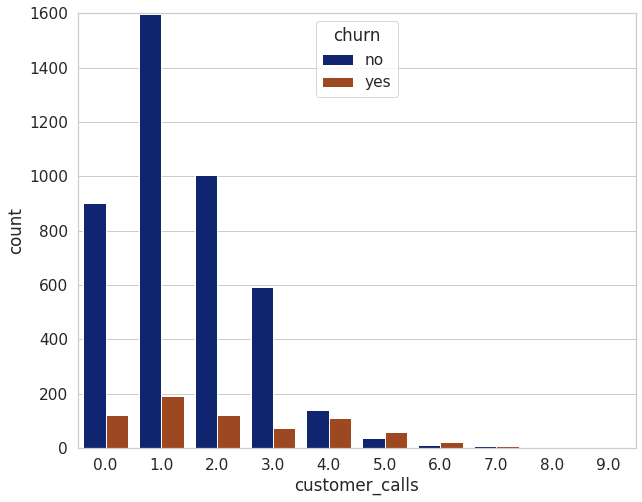

In [ ]:
sns.set(style = 'whitegrid', font_scale = 1.4)
plt.figure(figsize=(10,8))
sns.countplot( data=df, x='customer_calls',hue='churn',palette='dark')
plt.ylim(0, 1600)
plt.show()

In [ ]:
df_churn_yes.describe(include='all')

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
count,707,707,707.000000,707,707.000000,707,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,705.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707
unique,51,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NJ,area_code_415,NaN,no,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
freq,28,346,NaN,605,NaN,508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,707
mean,NaN,NaN,102.332390,NaN,4.496464,NaN,10.692362,4.151344,2.887426,207.870580,100.817539,35.338416,211.693617,99.884017,17.999562,206.078218,99.575672,9.273607,2.254597,NaN
std,NaN,NaN,39.396993,NaN,11.297719,NaN,2.793187,2.550011,0.754057,68.576475,20.757110,11.658195,51.623121,19.618258,4.383293,49.685763,19.968555,2.235902,1.815956,NaN
min,NaN,NaN,1.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,42.000000,2.130000,0.000000,NaN
25%,NaN,NaN,76.000000,NaN,0.000000,NaN,8.800000,2.000000,2.380000,153.500000,88.000000,26.095000,175.800000,86.500000,14.945000,171.750000,85.000000,7.730000,1.000000,NaN
50%,NaN,NaN,102.000000,NaN,0.000000,NaN,10.600000,4.000000,2.860000,215.900000,101.000000,36.700000,211.000000,99.000000,17.940000,206.300000,100.000000,9.280000,2.000000,NaN
75%,NaN,NaN,126.500000,NaN,0.000000,NaN,12.800000,5.000000,3.460000,266.450000,115.000000,45.295000,249.300000,113.500000,21.190000,240.850000,114.000000,10.840000,4.000000,NaN


In [ ]:
df_churn_no.describe(include='all')

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
count,4293,4293,4293.000000,4293,4293.000000,4293,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4286.000000,4271.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293
unique,51,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,WV,area_code_415,NaN,no,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,136,2149,NaN,3072,NaN,4019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4293
mean,NaN,NaN,99.917074,NaN,8.291870,NaN,10.190869,4.481947,2.752055,175.746564,99.899604,29.880698,198.745891,100.241556,16.898654,199.455113,99.975775,8.975593,1.457722,NaN
std,NaN,NaN,39.737531,NaN,13.809408,NaN,2.749994,2.438233,0.742443,49.634575,19.674019,8.442350,50.145914,19.862391,4.262900,50.609570,19.958820,2.277438,1.164236,NaN
min,NaN,NaN,1.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,73.000000,NaN,0.000000,NaN,8.500000,3.000000,2.300000,142.900000,87.000000,24.300000,164.500000,87.000000,13.980000,165.900000,87.000000,7.470000,1.000000,NaN
50%,NaN,NaN,99.000000,NaN,0.000000,NaN,10.300000,4.000000,2.780000,178.000000,100.000000,30.260000,199.500000,101.000000,16.960000,199.000000,100.000000,8.960000,1.000000,NaN
75%,NaN,NaN,127.000000,NaN,20.000000,NaN,12.000000,6.000000,3.240000,210.700000,113.000000,35.820000,232.250000,114.000000,19.750000,233.400000,113.000000,10.500000,2.000000,NaN


<AxesSubplot:xlabel='state', ylabel='count'>

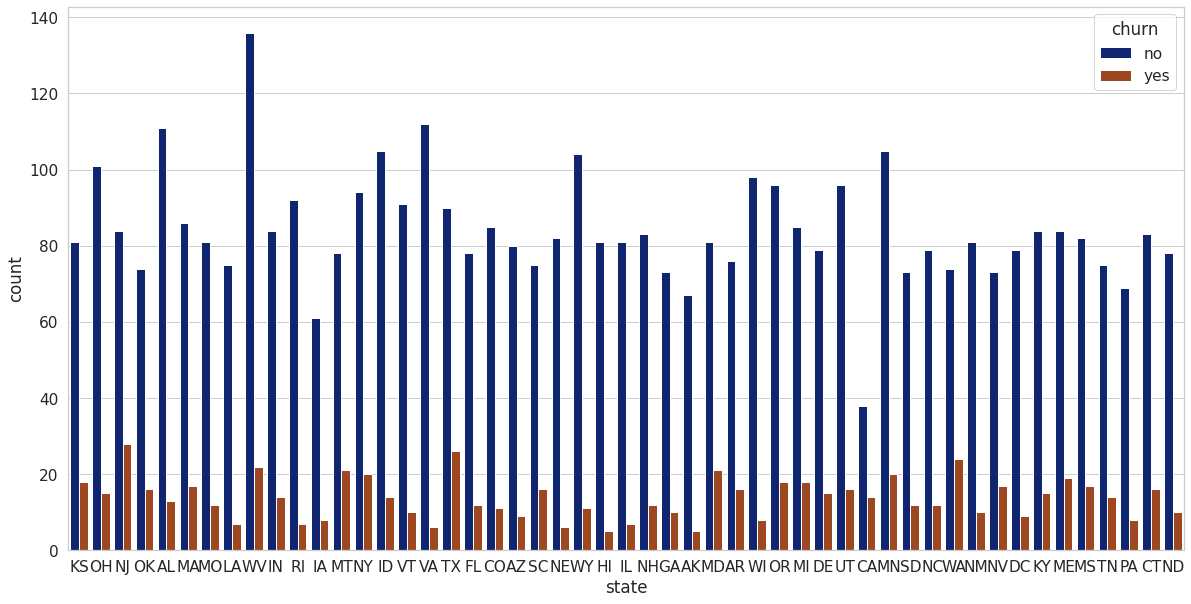

In [ ]:
sns.set(style = 'whitegrid', font_scale = 1.4)
plt.figure(figsize=(20,10))
sns.countplot(data = df, x='state', palette='dark', hue='churn')

In [ ]:
plt.figure(figsize=(15,10))
df['state'].value_counts().head()


WV    158
MN    125
AL    124
ID    119
VA    118
Name: state, dtype: int64

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='state', ylabel='count'>

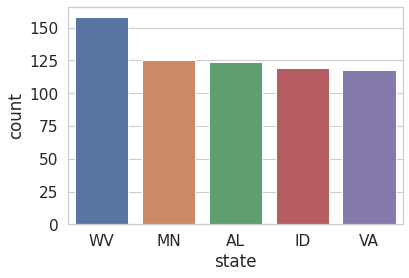

In [ ]:
sns.countplot(x="state", data=df, palette="deep", order=df.state.value_counts().iloc[:5].index)

<AxesSubplot:xlabel='state', ylabel='count'>

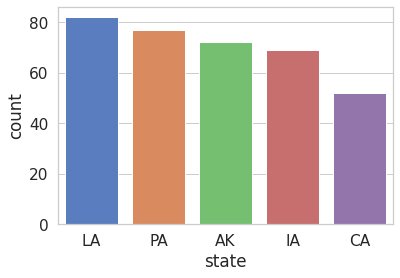

In [ ]:
sns.countplot(x="state", data=df, palette="muted", order=df.state.value_counts().iloc[-5:].head().index)

In [ ]:
df.state.value_counts().iloc[:5].index

Index(['WV', 'MN', 'AL', 'ID', 'VA'], dtype='object')

<AxesSubplot:xlabel='churn', ylabel='count'>

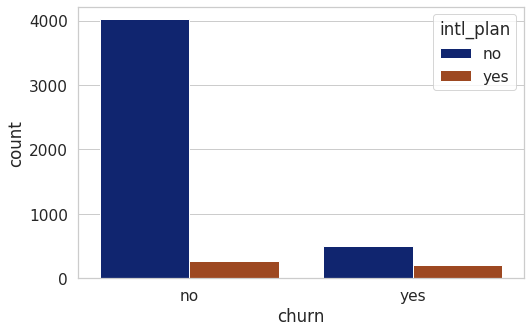

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data = df, x='churn', palette='dark', hue='intl_plan')

Group by willl show numerical values only

In [ ]:
df['churn'].value_counts()

no     4293
yes     707
Name: churn, dtype: int64

<AxesSubplot:xlabel='churn', ylabel='count'>

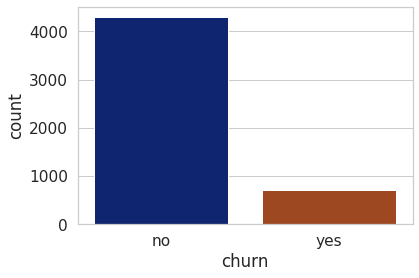

In [ ]:
sns.countplot(data=df, x='churn', palette='dark')

<AxesSubplot:ylabel='churn'>

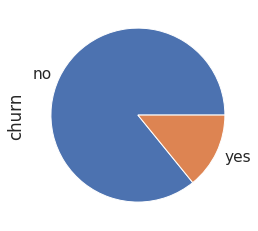

In [ ]:
(df['churn'].value_counts()).plot.pie()

This shows data is highly imbalanced.

In [ ]:
g.get_group('yes')[['voice_plan']].value_counts()

voice_plan
no            605
yes           102
dtype: int64

Text(0, 0.5, 'Count')

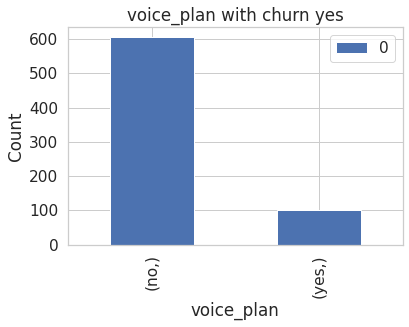

In [ ]:
(pd.DataFrame(g.get_group('yes')[['voice_plan']].value_counts())).plot.bar()
plt.title("voice_plan with churn yes")
plt.xlabel("voice_plan")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

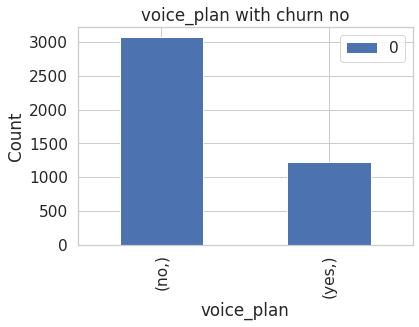

In [ ]:
(pd.DataFrame(g.get_group('no')[['voice_plan']].value_counts())).plot.bar()
plt.title("voice_plan with churn no")
plt.xlabel("voice_plan")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

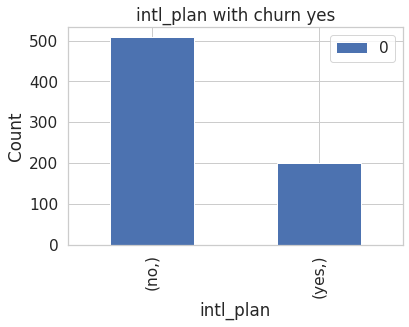

In [ ]:
(pd.DataFrame(g.get_group('yes')[['intl_plan']].value_counts())).plot.bar()
plt.title("intl_plan with churn yes")
plt.xlabel("intl_plan")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

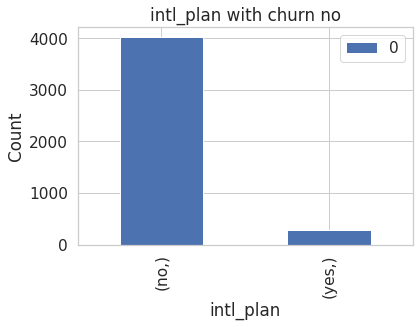

In [ ]:
(pd.DataFrame(g.get_group('no')[['intl_plan']].value_counts())).plot.bar()
plt.title("intl_plan with churn no")
plt.xlabel("intl_plan")
plt.ylabel("Count")

This barplot indicate the customers with Voice plan and Internation plan will not churn out.

We can infere the following point from boxplots and Bar plots:
1. account_length -  Both churn yes and no account has same  approx 100 days account_length We can assume those are month values
2.Day call and charge - Clients with high call min and charges has churn yes 

<AxesSubplot:>

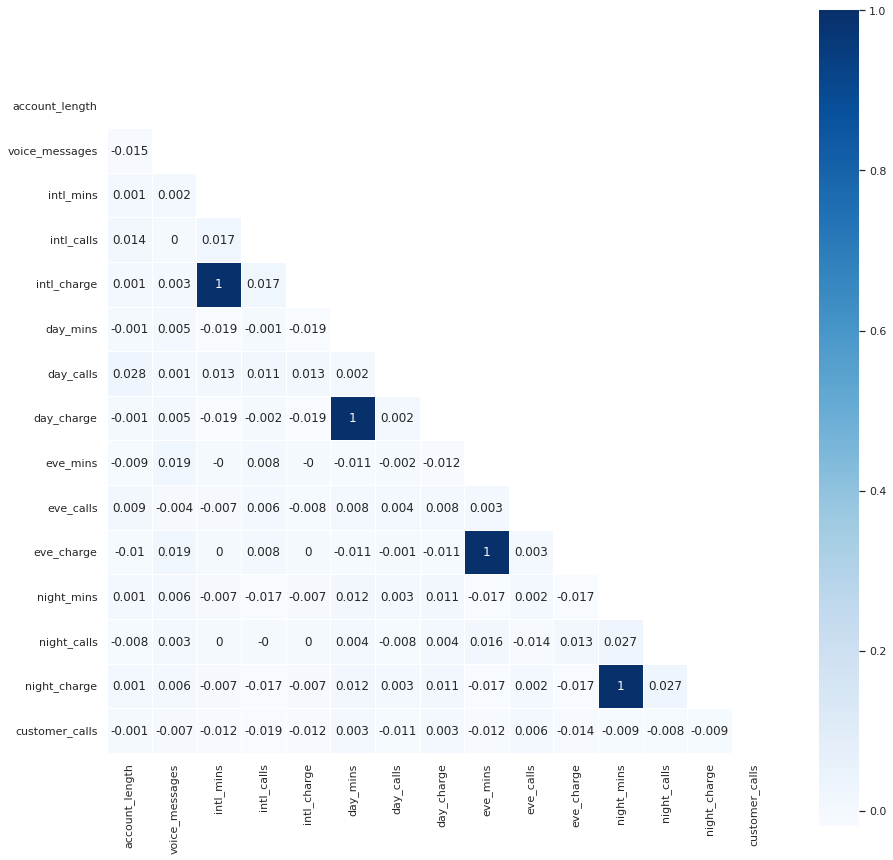

In [ ]:
sns.set(style = 'whitegrid', font_scale = 1)
correlation = np.round(df.corr(),3)
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,15))
sns.heatmap(correlation, mask=mask, cmap='Blues', annot=True,linewidth = .5, square = True)

Split the data into training and testing set

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# X and y will be thought of as the entire training data
# X_test and y_test will be thought of as the out of sample data for model evaluation

X, X_test, y, y_test = train_test_split(df.drop('churn', axis=1), df['churn'], test_size=0.3, random_state=0, stratify=df['churn'], shuffle=True)

In [32]:
#We have imbalanced target so using stratify to divide train and test data with equal values of churn yes and no

In [33]:
from locale import normalize
df['churn'].value_counts(normalize=True)

no     0.8586
yes    0.1414
Name: churn, dtype: float64

In [34]:
y.value_counts(normalize=True)

no     0.858571
yes    0.141429
Name: churn, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

no     0.858667
yes    0.141333
Name: churn, dtype: float64

In [35]:
# this indicates that we have churn yes and no values equally distributed across train and test data

In [36]:
# From the pair plot we know there is strong corr between day, eve, int and night mins and thier respective charges.

In [37]:
# we can drop mins cloumns

In [38]:
X.drop(['intl_charge','day_charge','eve_charge','night_charge'], axis=1, inplace=True)
X_test.drop(['intl_charge','day_charge','eve_charge','night_charge'], axis=1, inplace=True)

In [39]:
X.shape

(3500, 15)

In [40]:
#num_cols

In [41]:
num_cols_reduced = ['account_length',
 'voice_messages',
 'intl_mins',
 'intl_calls',
 'day_mins',
 'day_calls',
 'eve_mins',
 'eve_calls',
 'night_mins',
 'night_calls',
 'customer_calls']

In [42]:
cat_cols_reduced = ['state', 'area_code', 'voice_plan', 'intl_plan']

In [43]:
X.head(1)

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,day_mins,day_calls,eve_mins,eve_calls,night_mins,night_calls,customer_calls
2855,MN,area_code_415,95.0,no,0.0,no,8.1,2.0,149.2,96.0,260.7,116.0,201.0,120.0,1.0


Feature scaling and model building

In [94]:
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from lightgbm import LGBMClassifier

In [45]:
#we have imbalanced target variable so let's use compute class weight function

In [46]:
from sklearn.utils.class_weight import compute_class_weight

In [47]:
class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)

In [48]:
import numpy as np

In [49]:
classes=np.unique(y)
classes

array(['no', 'yes'], dtype=object)

In [50]:
class_weight

array([0.58236273, 3.53535354])

In [51]:
class_weight = {'no': 0.6, 'yes': 3.6}
class_weight

{'no': 0.6, 'yes': 3.6}

In [52]:

y.unique()

array(['no', 'yes'], dtype=object)

###MOdel Building

In [53]:
num_pipe = Pipeline([
    ('impute', IterativeImputer()),
    ('scale', MinMaxScaler()),
])

In [54]:
[int(x) for x in np.linspace(start = 20, stop = 250, num = 5)]

[20, 77, 135, 192, 250]

In [55]:
ct = ColumnTransformer([
    ('num_pipe', num_pipe, num_cols_reduced),
    ('cat_cols', OneHotEncoder(sparse = False, handle_unknown= "ignore"), cat_cols_reduced)
], remainder='passthrough')

In [65]:
grid = {
    RandomForestClassifier(random_state=0, n_jobs=-1, class_weight=class_weight):
    {'model__n_estimators': [int(x) for x in np.linspace(start = 20, stop = 250, num = 5)],     
     'model__max_features' : ['auto', 'sqrt'],
     'model__max_depth':[5, 9, 13],
     'model__min_samples_split':[4,6,8],
     'model__min_samples_leaf' : [1, 2],
     'coltf__num_pipe__impute__estimator':[LinearRegression(),RandomForestRegressor(random_state=0), KNeighborsRegressor()]},

    LGBMClassifier(class_weight="balanced", n_jobs=-1, random_state=0):
     {'model__n_estimators':[300,400,500],
      'model__max_depth':[5, 9, 13],
      'model__num_leaves': [7,15,31],
      'model__learning_rate':[0.0001,0.001,0.01,0.1,],
      'model__boosting_type': ['gbdt', 'goss', 'dart'],
      'coltf__num_pipe__impute__estimator':[LinearRegression(), RandomForestRegressor(random_state=0)]},

     GradientBoostingClassifier():
      {'model__learning_rate': [0.05, 0.1, 0.2],
       'model__max_depth': [3, 5, 7],
       'model__n_estimators': [100, 200, 500]},
          
    KNeighborsClassifier():
     {'model__n_neighbors': np.arange(1,5)},

    SVC():
     {'model__kernel' : ['linear', 'rbf'],
      'model__C' : np.arange(1,5,1),
      'model__gamma' : ['scale', 'auto']},

    LogisticRegression():  
     {'model__penalty' : ['l2', 'elasticnet'],
      'model__solver' : ['lbfgs','newton-cg'],
      'model__max_iter' : [1000,2500]}

}

In [66]:
for clf, param in grid.items():
  print(clf)
  print('-'*100)
  print(param)
  print('\n')

RandomForestClassifier(class_weight={'no': 0.6, 'yes': 3.6}, n_jobs=-1,
                       random_state=0)
----------------------------------------------------------------------------------------------------
{'model__n_estimators': [20, 77, 135, 192, 250], 'model__max_features': ['auto', 'sqrt'], 'model__max_depth': [5, 9, 13], 'model__min_samples_split': [4, 6, 8], 'model__min_samples_leaf': [1, 2], 'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0), KNeighborsRegressor()]}


LGBMClassifier(class_weight='balanced', random_state=0)
----------------------------------------------------------------------------------------------------
{'model__n_estimators': [300, 400, 500], 'model__max_depth': [5, 9, 13], 'model__num_leaves': [7, 15, 31], 'model__learning_rate': [0.0001, 0.001, 0.01, 0.1], 'model__boosting_type': ['gbdt', 'goss', 'dart'], 'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0)]}


G

In [67]:
full_df = pd.DataFrame()
best_algorithm = {}

for clf, param in grid.items():
  pipe = Pipeline([
      ('coltf', ct),
      ('model', clf)
  ])

  rs = RandomizedSearchCV(estimator=pipe, param_distributions=param, scoring='accuracy', cv=3, n_jobs=-1, verbose=3, n_iter=6, random_state=0)

  rs.fit(X, y)

  all_res = pd.DataFrame(rs.cv_results_)

  temp = all_res.loc[:, ['params', 'mean_test_score']]
  algo_name = str(clf).split('(')[0]
  temp['algo'] = algo_name

  full_df = pd.concat([full_df, temp], ignore_index=True)
  best_algorithm[algo_name] = rs.best_estimator_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=6. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File

In [68]:
full_df.sort_values('mean_test_score', ascending=False)

,params,mean_test_score,algo
16,"{'model__n_estimators': 500, 'model__max_depth...",0.950571,GradientBoostingClassifier
12,"{'model__n_estimators': 500, 'model__max_depth...",0.950284,GradientBoostingClassifier
17,"{'model__n_estimators': 500, 'model__max_depth...",0.949428,GradientBoostingClassifier
14,"{'model__n_estimators': 500, 'model__max_depth...",0.949142,GradientBoostingClassifier
15,"{'model__n_estimators': 500, 'model__max_depth...",0.949141,GradientBoostingClassifier
7,"{'model__num_leaves': 31, 'model__n_estimators...",0.948285,LGBMClassifier
13,"{'model__n_estimators': 100, 'model__max_depth...",0.943142,GradientBoostingClassifier
8,"{'model__num_leaves': 7, 'model__n_estimators'...",0.938002,LGBMClassifier
2,"{'model__n_estimators': 192, 'model__min_sampl...",0.933427,RandomForestClassifier
11,"{'model__num_leaves': 15, 'model__n_estimators...",0.921999,LGBMClassifier


In [70]:
be = best_algorithm['GradientBoostingClassifier']
be

Pipeline(steps=[('coltf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['account_length',
                                                   'voice_messages',
                                                   'intl_mins', 'intl_calls',
                                                   'day_mins', 'day_calls',
                                                   'eve_mins', 'eve_calls',
                                                   'night_mins', 'night_calls',
                                                   'customer_calls']),
                                                 ('cat_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['state', 'area_code',
                                                   'voice_plan',
                                                   'intl_plan'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=5,
                                            n_estimators=500))])

In [72]:
be.fit(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('coltf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['account_length',
                                                   'voice_messages',
                                                   'intl_mins', 'intl_calls',
                                                   'day_mins', 'day_calls',
                                                   'eve_mins', 'eve_calls',
                                                   'night_mins', 'night_calls',
                                                   'customer_calls']),
                                                 ('cat_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['state', 'area_code',
                                                   'voice_plan',
                                                   'intl_plan'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=5,
                                            n_estimators=500))])

In [74]:
preds = be.predict(X_test)

In [89]:
from sklearn.metrics import confusion_matrix, classification_report

In [95]:
from sklearn.metrics import ConfusionMatrixDisplay

In [99]:
cm=confusion_matrix(y_test, preds,labels=be.classes_)
cm

array([[1269,   19],
       [  47,  165]])

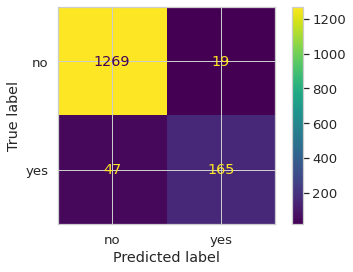

In [101]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=be.classes_)
disp.plot()
plt.show()

In [84]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          no       0.96      0.99      0.97      1288
         yes       0.90      0.78      0.83       212

    accuracy                           0.96      1500
   macro avg       0.93      0.88      0.90      1500
weighted avg       0.95      0.96      0.95      1500



In [86]:
# our target values are highly imbalance, so we can use PR curve to check classifier performance

In [102]:
#from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

In [104]:
#plot_precision_recall_curve(be, X_test, y_test)
#plt.plot([0,1], [0.141,0.141], c='k')

In [105]:
from sklearn.model_selection import learning_curve

In [108]:
#pd.DataFrame(be.predict_proba(X_test))

In [109]:
a, b, c = learning_curve(be, X, y, n_jobs=-1, scoring='accuracy')

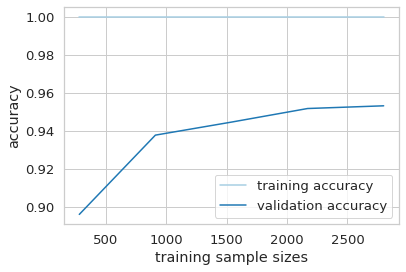

In [110]:
plt.plot(a, b.mean(axis=1), label='training accuracy')
plt.plot(a, c.mean(axis=1),  label='validation accuracy')
plt.xlabel('training sample sizes')
plt.ylabel('accuracy')
plt.legend()

In [111]:
# looks like Overfitting:
#High training accuracy (--- low bias)
#Low testing/ validation accuracy (--- high variance)
#Big gap between training and validation curves (--- high variance)
#Overfitting makes a very complex model and learns even the "noise" in the data, which is undesirable

In [112]:
#try reducing number of features
#try increasing regularization (lambda)
#ry pruning the decision trees

As we see, we get poor results of precision and recall for 1 classification. We can use resampling technique to reduce imbalanced target variable

Over-sampling with SMOTE (Synthetic Minority Over-sampling Technique)
One of the methods that can be used to eliminate the imbalance in the data set is the sampling (resampling) process. There are two methods available:

The first method is to obtain classes with equal number of data by increasing the data of minority classes with various methods. It is called oversampling.

Another method is to obtain a balanced dataset by removing the data belonging to the weighted class from the dataset. It is referred to as the undersampling process.

The oversampling method was preferred because the number of samples in the used dataset is small and undersampling will cause data loss. In order to apply this method, synthetic data belonging to minority classes were produced by using the SMOTE technique in the imbalanced-learn library.bold text

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0.5, 1.0, 'Before SMOTE')

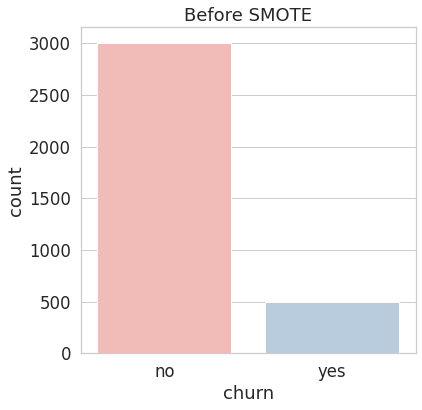

In [114]:
sns.set(style = 'whitegrid', font_scale = 1.5)
plt.subplots(figsize = (6,6))
sns.countplot(x = y, palette = 'Pastel1').set_title('Before SMOTE')

In [115]:
#SMOTE 
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [116]:
num_pipe1 = Pipeline([
    ('impute', IterativeImputer(estimator=LinearRegression())),
    ('scale', MinMaxScaler()),
])

In [117]:
ct1 = ColumnTransformer([
    ('num_pipe1', num_pipe1, num_cols_reduced),
    ('cat_cols', OneHotEncoder(sparse = False, handle_unknown= "ignore"), cat_cols_reduced)
], remainder='passthrough')

### Z-Score Method Handling Outliers

In [140]:
X.shape

(3500, 15)

In [127]:
X_cap = X.copy()

In [128]:
X_test_cap = X_test.copy()

In [129]:
X_cap.shape

(3500, 15)

In [130]:
X_cap.columns

Index(['state', 'area_code', 'account_length', 'voice_plan', 'voice_messages',
       'intl_plan', 'intl_mins', 'intl_calls', 'day_mins', 'day_calls',
       'eve_mins', 'eve_calls', 'night_mins', 'night_calls', 'customer_calls'],
      dtype='object')

In [131]:
features = ['account_length','intl_mins', 'intl_calls', 'day_mins', 'day_calls',
       'eve_mins', 'eve_calls', 'night_mins', 'night_calls']

In [132]:
import scipy.stats as stats

In [133]:
features

['account_length',
 'intl_mins',
 'intl_calls',
 'day_mins',
 'day_calls',
 'eve_mins',
 'eve_calls',
 'night_mins',
 'night_calls']

In [134]:
def zscore_capping(DF, COLS, THR):

  for col in COLS:

    mean = DF[col].mean()
    std = DF[col].std()

    upper_bond = mean + THR*std
    lower_bond = mean - THR*std

    DF[col] = np.where(DF[col]>upper_bond, upper_bond,
                          np.where(DF[col]<lower_bond, lower_bond, DF[col]))

In [135]:
zscore_capping(X_cap, features, 3)

In [136]:
zscore_capping(X_test_cap, features, 3)

In [137]:
np.round(X_cap.describe(),3)

,account_length,voice_messages,intl_mins,intl_calls,day_mins,day_calls,eve_mins,eve_calls,night_mins,night_calls,customer_calls
count,3500.000,3500.000,3500.000,3500.000,3500.000,3500.000,3481.000,3500.000,3500.000,3500.000,3500.000
mean,100.204,7.893,10.257,4.399,179.946,100.183,201.001,99.927,199.775,99.386,1.561
std,40.130,13.629,2.736,2.335,53.544,19.953,50.591,19.834,50.328,19.908,1.290
min,1.000,0.000,1.928,0.000,18.930,39.937,48.825,40.099,48.316,39.278,0.000
25%,73.000,0.000,8.500,3.000,144.375,87.000,166.800,87.000,166.700,86.000,1.000
50%,100.000,0.000,10.300,4.000,180.100,100.000,201.000,100.000,199.050,99.000,1.000
75%,127.250,17.000,12.000,6.000,216.200,114.000,235.200,113.000,233.400,113.000,2.000
max,220.748,52.000,18.569,11.872,340.916,160.371,353.130,159.726,351.247,159.478,9.000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


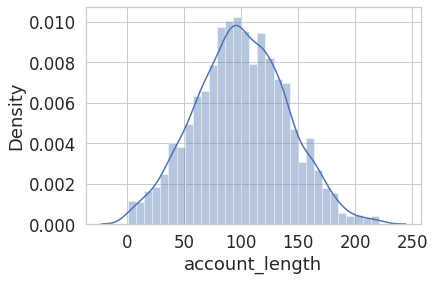

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


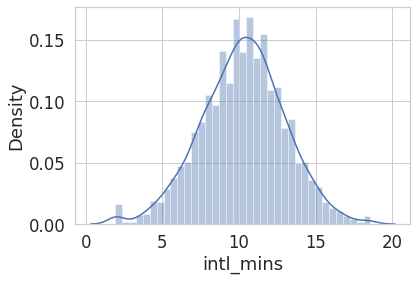

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


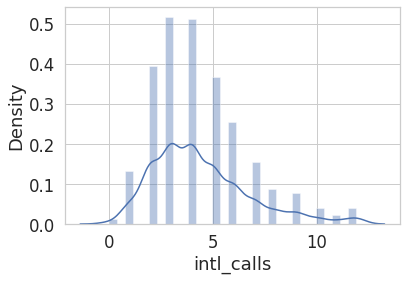

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


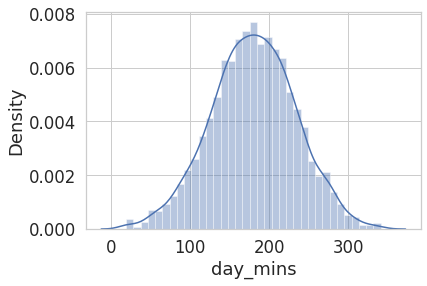

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


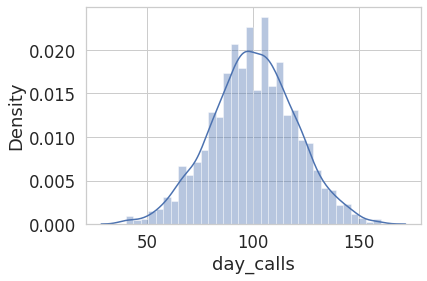

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


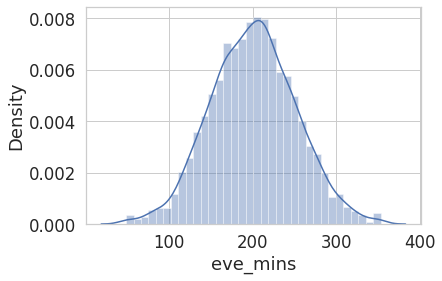

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


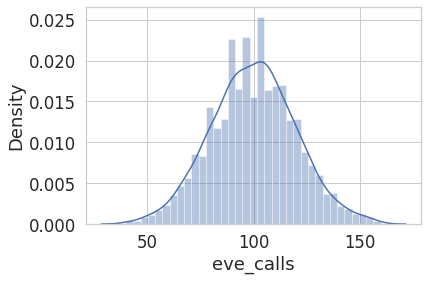

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


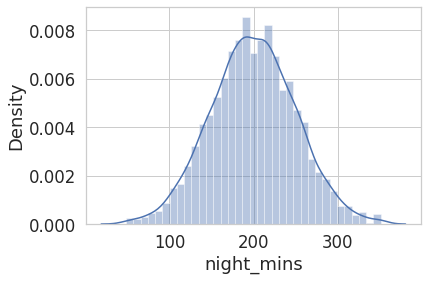

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


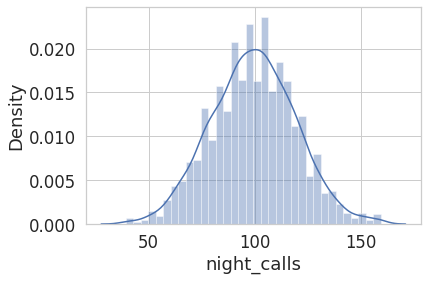

In [138]:
for i in features:
    sns.distplot(X_cap[i])
    plt.show()

In [139]:
# we have X_cap, X_test_cap, y, y_test
print(X_cap.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(3500, 15)
(1500, 15)
(3500,)
(1500,)


In [ ]:
#we can do resampling using SMOTE

In [148]:
sm = SMOTE(random_state=40)
X_res, y_res = sm.fit_resample(ct1.fit_transform(X_cap), y)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [149]:
print(X_res.shape)
print(X_test.shape)
print(y_res.shape)
print(y_test.shape)

(6010, 69)
(1500, 15)
(6010,)
(1500,)


Text(0.5, 1.0, 'After SMOTE')

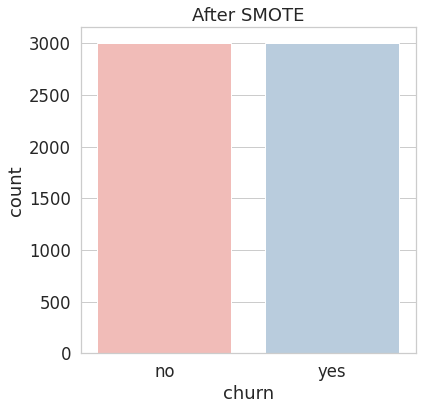

In [151]:
sns.set(style = 'whitegrid', font_scale = 1.5)
plt.subplots(figsize = (6,6))
sns.countplot(x = y_res_df.churn, palette = 'Pastel1').set_title('After SMOTE')

In [153]:
grid = {
    RandomForestClassifier(random_state=0, n_jobs=-1, class_weight=class_weight):
    {'model__n_estimators': [int(x) for x in np.linspace(start = 20, stop = 300, num = 5)],     
     'model__max_features' : ['auto', 'sqrt'],
     'model__max_depth':[5, 9, 13],
     'model__min_samples_split':[4,6,8],
     'model__min_samples_leaf' : [1, 2],
    },

    LGBMClassifier(class_weight="balanced", n_jobs=-1, random_state=0):
     {'model__n_estimators':[int(x) for x in np.linspace(start = 20, stop = 300, num = 5)],
      'model__max_depth':[5, 7, 9],
      'model__num_leaves': [7,15,31],
      'model__learning_rate':[0.0001,0.001,0.01,0.1,],
      'model__boosting_type': ['gbdt', 'goss', 'dart'],
      },

     GradientBoostingClassifier():
      {'model__learning_rate': [0.05, 0.1, 0.2],
       'model__max_depth': [3, 5, 7],
       'model__n_estimators': [int(x) for x in np.linspace(start = 20, stop = 300, num = 5)]
       },
          
    KNeighborsClassifier():
     {'model__n_neighbors': np.arange(1,5)
     },

    SVC():
     {'model__kernel' : ['linear', 'rbf'],
      'model__C' : np.arange(1,5,1),
      'model__gamma' : ['scale', 'auto']
      },

    LogisticRegression():  
     {'model__penalty' : ['l2', 'elasticnet'],
      'model__solver' : ['lbfgs','newton-cg'],
      'model__max_iter' : [1000,2500]
      }

}

In [154]:
for clf, param in grid.items():
  print(clf)
  print('-'*100)
  print(param)
  print('\n')

RandomForestClassifier(class_weight={'no': 0.6, 'yes': 3.6}, n_jobs=-1,
                       random_state=0)
----------------------------------------------------------------------------------------------------
{'model__n_estimators': [20, 90, 160, 230, 300], 'model__max_features': ['auto', 'sqrt'], 'model__max_depth': [5, 9, 13], 'model__min_samples_split': [4, 6, 8], 'model__min_samples_leaf': [1, 2]}


LGBMClassifier(class_weight='balanced', random_state=0)
----------------------------------------------------------------------------------------------------
{'model__n_estimators': [20, 90, 160, 230, 300], 'model__max_depth': [5, 7, 9], 'model__num_leaves': [7, 15, 31], 'model__learning_rate': [0.0001, 0.001, 0.01, 0.1], 'model__boosting_type': ['gbdt', 'goss', 'dart']}


GradientBoostingClassifier()
----------------------------------------------------------------------------------------------------
{'model__learning_rate': [0.05, 0.1, 0.2], 'model__max_depth': [3, 5, 7], 'model__n_e

In [155]:
full_df = pd.DataFrame()
best_algorithm = {}

for clf, param in grid.items():
  pipe = Pipeline([
      ('model', clf)
  ])

  rs = RandomizedSearchCV(estimator=pipe, param_distributions=param, scoring='accuracy', n_iter=6, cv=3, verbose=3, random_state=0, n_jobs=-1)

  rs.fit(X_res, y_res)

  all_results = pd.DataFrame(rs.cv_results_)

  temp = all_results.loc[:, ['params', 'mean_test_score']]
  algo_name = str(clf).split('(')[0]
  temp['algo'] = algo_name

  full_df = pd.concat([full_df, temp], ignore_index=True)
  best_algorithm[algo_name] = rs.best_estimator_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=6. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File

In [156]:
full_df.sort_values('mean_test_score', ascending=False)

,params,mean_test_score,algo
14,"{'model__n_estimators': 160, 'model__max_depth...",0.962235,GradientBoostingClassifier
13,"{'model__n_estimators': 160, 'model__max_depth...",0.957412,GradientBoostingClassifier
10,"{'model__num_leaves': 31, 'model__n_estimators...",0.953583,LGBMClassifier
15,"{'model__n_estimators': 300, 'model__max_depth...",0.931789,GradientBoostingClassifier
17,"{'model__n_estimators': 20, 'model__max_depth'...",0.923130,GradientBoostingClassifier
19,{'model__n_neighbors': 2},0.908986,KNeighborsClassifier
18,{'model__n_neighbors': 1},0.906988,KNeighborsClassifier
16,"{'model__n_estimators': 20, 'model__max_depth'...",0.896340,GradientBoostingClassifier
26,"{'model__kernel': 'rbf', 'model__gamma': 'scal...",0.895345,SVC
25,"{'model__kernel': 'rbf', 'model__gamma': 'scal...",0.891519,SVC


In [167]:
full_df.sort_values('mean_test_score', ascending=False).iloc[0,0]

{'model__n_estimators': 160,
 'model__max_depth': 7,
 'model__learning_rate': 0.1}

In [168]:
be=best_algorithm['LGBMClassifier']
be

Pipeline(steps=[('model',
                 LGBMClassifier(class_weight='balanced', max_depth=5,
                                n_estimators=90, random_state=0))])

In [169]:
be.fit(X_res, y_res)

Pipeline(steps=[('model',
                 LGBMClassifier(class_weight='balanced', max_depth=5,
                                n_estimators=90, random_state=0))])

In [170]:
preds=be.predict(ct1.transform(X_test))

In [171]:
cm=confusion_matrix(y_test, preds,labels=be.classes_)
cm

array([[1243,   45],
       [  42,  170]])

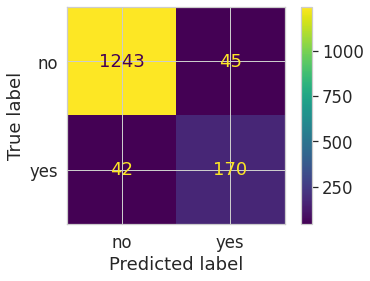

In [172]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=be.classes_)
disp.plot()
plt.show()

In [173]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          no       0.97      0.97      0.97      1288
         yes       0.79      0.80      0.80       212

    accuracy                           0.94      1500
   macro avg       0.88      0.88      0.88      1500
weighted avg       0.94      0.94      0.94      1500



In [176]:
a, b, c = learning_curve(be, X_res, y_res, n_jobs=-1, scoring='accuracy')

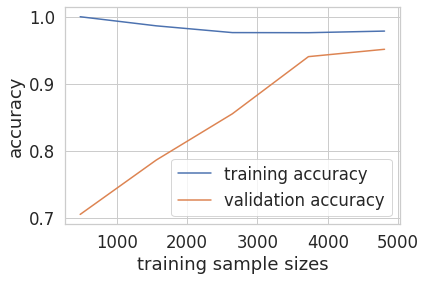

In [177]:

plt.plot(a, b.mean(axis=1), label='training accuracy')
plt.plot(a, c.mean(axis=1),  label='validation accuracy')
plt.xlabel('training sample sizes')
plt.ylabel('accuracy')
plt.legend()